Run the following commands in your terminal before running this notebook:

`python -m venv edc2024`

`source edc2024/bin/activate`

`pip install poetry`

`poetry install --no-root`

`pip install tensorflow-macos==2.14.0`

# Useful Links

Google's interactive exercises: https://developers.google.com/machine-learning/crash-course/neural-networks/interactive-exercises

Perceptron from scratch: https://medium.com/@becaye-balde/perceptron-building-it-from-scratch-in-python-15716806ef64

Neural nets to recognise handwritten digits: http://neuralnetworksanddeeplearning.com/chap1.html



# Workshop Outline

We start by talking about **biological neurons** and how they inspired a very simple type of neuron: **the Perceptron**. We will show that a Perceptron is really a linear classifier.
We will code the Perceptron from scratch.

If you create a **Perceptron Network**, you end up with a more complex linear classifier.

Linear classifiers are very useful, but can't solve all problems. To modify a perceptron to make it even more powerful, we look at the **Activation Function**. The activation function takes you from the input to the output. In the case of a perceptron, it's a simple step function. If you change this activation slightly to make it a continuous function, it has very attractive mathematical properties.

In particular, we talk about the sigmoid activation function. This allows us to create a **Sigmoid Neuron**, which we can put together to create a neural network. We will discuss the **Neural Network Architecture** and the key challenges of training them.

A reasonably sized NN could have millions of parameters. Given training data, one of the goals is to find the parameters of NN that are going to perform the mapping of input to output with a high level of reliability and accurancy. For that, we use a technique called **Gradient Descent**. In practice, gradient descent is performed using **Backpropagation**. Backpropagation is a technique based on the Chain Rule for Derivatives (and is something we will only briefly mention, providing further resources for the mathematicians amongst us).

We will train a neural network that recognises handwritten digits.

Next, we will introduce the concept of modifying NN architecture for specific tasks, specifically introducing **recurrent neural networks**. This will be a brief discussion, followed by creating a neural network to write Shakespearian sonnets!

# Biological Neurons

A biological neuron has 4 main components: The **dendrites**, which receive signals/inputs from other neurons; the **nucleus**, which processes those inputs in some simple way, producing an output; the **axon**, through which the output travels down to the **synapses**, which pass on that output to the next neuron. This signalling and transfer of information is electrical and chemical.

A single neuron is doing something very simple, so from a computational perspective can be viewed as a simple computational module, which if you put together in large numbers may be able to do something remarkable.

That's what a neural network does.

<img src="./1_introduction/biological-neuron.jpg" />

# Perceptron as a Linear Classifier

This video describes it well (until 6:28): https://www.youtube.com/watch?v=OFbnpY_k7js

Let's implement the Perceptron from scratch to apply it to a real-world classification problem.

In [1]:
# TODO: Since the idea of training is not introduced until later, 
#       either find another practical example to avoid training 
#       (e.g. use keras implementation of perceptron) or
#       find a way to introduce the idea of training/fitting the model here

import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    # Train the perceptron
    def fit(self, X, y):
        """Fits training data.
        This function take the input of features,
        make predictions, update the weights n_iter times.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """

        # initializing the weights
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        # print("Weights:", self.w_)

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):

                # 1. calculate y^
                y_pred = self.predict(xi)

                # 2. calculate Update
                # update = η * (y - y^)
                update = self.eta * (target - y_pred)

                # 3. Update the weights
                # Wi = Wi + Δ(Wi)       where  Δ(Wi) = update * Xi
                self.w_[1:] = self.w_[1:] + update * xi
                # print(self.w_[1:])

                # Xo = 1 => update * 1 = update
                self.w_[0] = self.w_[0] + update

                # update != 0  ==>  y^ != y  ==>  there is an error
                error += int(update != 0.0)

            self.errors_.append(error)

        return self

    # Weighted Sum
    def net_input(self, X):
        """
        The net_input() function returns the dot product
        i.e. the weighted sum: sum of w*x
        :param: X: an array of features (inputs)
        Returns:
            the dot product of W and X
        """
        # Z = sum (Wi * Xi) where Wo = 0 et Xo = 1
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Step Function
    def predict(self, X):
        """
        The activation function.
        Returns the predicted value
        :param X: an array of features
        :return:
            y_pred - the predicted value:
                0 if the weighted sum < 0
                1 otherwise
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

*Explain what the iris dataset is and how a linear classifier, i.e. perceptron, can be used to solve this problem.

In [2]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection._split import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = shuffle(df)
print(df.head())


# Splitting the data
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

train_data, test_data, train_labels, test_labels = train_test_split(
                            X, y, test_size=0.25)

train_labels = np.where(train_labels == 'Iris-setosa', 1, -1)
test_labels = np.where(test_labels == 'Iris-setosa', 1, -1)

print('Train data:', train_data[0:2])
print('Train labels:', train_labels[0:5])

print('Test data:', test_data[0:2])
print('Test labels:', test_labels[0:5])

# fitting the perceptron
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(train_data, train_labels)

#  Predicting the results

test_preds = perceptron.predict(test_data)

print(test_preds)

# Mesuring Performances
accuracy = accuracy_score(test_preds, test_labels)
print('Accuracy:', round(accuracy, 2) * 100, "%")

       0    1    2    3                4
97   6.2  2.9  4.3  1.3  Iris-versicolor
89   5.5  2.5  4.0  1.3  Iris-versicolor
4    5.0  3.6  1.4  0.2      Iris-setosa
107  7.3  2.9  6.3  1.8   Iris-virginica
81   5.5  2.4  3.7  1.0  Iris-versicolor
Train data: [[6.7 3.1 4.7 1.5]
 [5.1 3.4 1.5 0.2]]
Train labels: [-1  1 -1 -1  1]
Test data: [[6.7 3.1 4.4 1.4]
 [5.  3.2 1.2 0.2]]
Test labels: [-1  1 -1 -1 -1]
[-1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1]
Accuracy: 100.0 %


This is how the Perceptron is implemented using Keras:

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers
y_pred

array([ True, False])

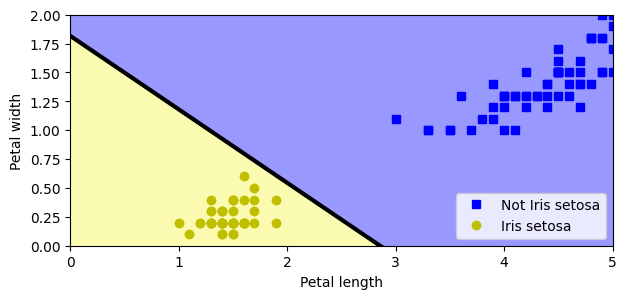

In [4]:
# plot the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

# More Complex Linear Classifier: Perceptron Networks

This is the best video that made everything make sense to me: https://www.youtube.com/watch?v=torNuKNLwBE

# More Powerful Networks: Activation Functions

I am just plagiarising this entire workshop: https://www.youtube.com/watch?v=_ETavTWv3ok

# Sigmoid Neuron & Neural Network Structure

Neural network is the same as described in Perceptron Networks, but the Perceptrons have been replaced with sigmoid neurons.

https://www.youtube.com/watch?v=Go1F4uHlD3c

# Training the Network

So far, we have assumed we live in the perfect world where we know all the weights and biases. In reality, we need to find them. 

This is done by randomly assigning weights and biases. Why? Because we don't know where else to start. Then we run the network on each training example, compare the output and the desired output, and adjust the weights to minimise the error.

*Should we go into the calculus of it all?*

# *Optional: Gradient Descent & Backpropagation*

Reference videos for the mathematically inclined:

Gradient descent: https://www.youtube.com/watch?v=YS_EztqZCD8

Backpropagation: https://www.youtube.com/watch?v=sIX_9n-1UbM

# Handwritten Digit Recognition

This is the example that was shown in the videos, so it works really well.

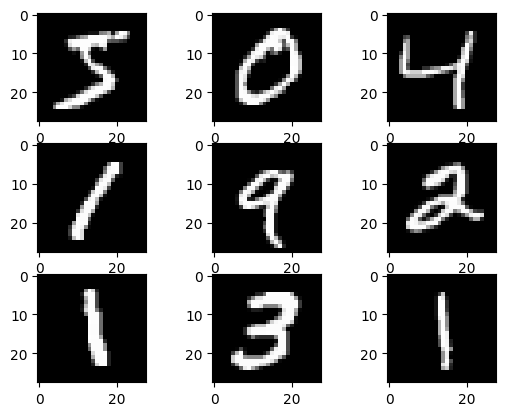

In [5]:
# Plot of images as baseline for comparison 
from keras.datasets import mnist 
from matplotlib import pyplot 
# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

In [6]:
# TODO: split up to guide the reader through the code

# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 1s - loss: 0.2790 - accuracy: 0.9211 - val_loss: 0.1407 - val_accuracy: 0.9589 - 1s/epoch - 4ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1128 - accuracy: 0.9668 - val_loss: 0.1035 - val_accuracy: 0.9687 - 874ms/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0715 - accuracy: 0.9793 - val_loss: 0.0770 - val_accuracy: 0.9767 - 847ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0503 - accuracy: 0.9857 - val_loss: 0.0728 - val_accuracy: 0.9767 - 846ms/epoch - 3ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0364 - accuracy: 0.9901 - val_loss: 0.0636 - val_accuracy: 0.9803 - 843ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0273 - accuracy: 0.9930 - val_loss: 0.0636 - val_accuracy: 0.9792 - 842ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0198 - accuracy: 0.9950 - val_loss: 0.0590 - val_accuracy: 0.9807 - 845ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0155 - accuracy: 0.9960 - val_loss: 0.0601 - val_accuracy: 0.9807 - 845ms/epoch - 3ms/step
Epo

# Generating Shakespearian Text

## Creating the Training Dataset

In [7]:
import tensorflow as tf

shakespeare_url = "https://homl.info/shakespeare"  # shortcut URL
filepath = tf.keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()
# shows a short text sample
print(shakespeare_text[:80])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.


In [8]:
# extra code – shows all 39 distinct characters (after converting to lower case)
"".join(sorted(set(shakespeare_text.lower())))

"\n !$&',-.3:;?abcdefghijklmnopqrstuvwxyz"

In [9]:
text_vec_layer = tf.keras.layers.TextVectorization(split="character",
                                                   standardize="lower")
text_vec_layer.adapt([shakespeare_text])
encoded = text_vec_layer([shakespeare_text])[0]

In [10]:
encoded -= 2  # drop tokens 0 (pad) and 1 (unknown), which we will not use
n_tokens = text_vec_layer.vocabulary_size() - 2  # number of distinct chars = 39
dataset_size = len(encoded)  # total number of chars = 1,115,394

In [11]:
n_tokens

39

In [12]:
dataset_size

1115394

In [13]:
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window_ds: window_ds.batch(length + 1))
    if shuffle:
        ds = ds.shuffle(100_000, seed=seed)
    ds = ds.batch(batch_size)
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

In [14]:
# extra code – a simple example using to_dataset()
# There's just one sample in this dataset: the input represents "to b" and the
# output represents "o be"
list(to_dataset(text_vec_layer(["To be"])[0], length=4))

[(<tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[ 4,  5,  2, 23]])>,
  <tf.Tensor: shape=(1, 4), dtype=int64, numpy=array([[ 5,  2, 23,  3]])>)]

In [15]:
length = 100
tf.random.set_seed(42)
train_set = to_dataset(encoded[:1_000_000], length=length, shuffle=True,
                       seed=42)
valid_set = to_dataset(encoded[1_000_000:1_060_000], length=length)
test_set = to_dataset(encoded[1_060_000:], length=length)

## Building and Training the Char-RNN Model

**Warning**: the following code may one or two hours to run, depending on your GPU. Without a GPU, it may take over 24 hours. If you don't want to wait, just skip the next two code cells and run the code below to download a pretrained model.

**Note**: the `GRU` class will only use cuDNN acceleration (assuming you have a GPU) when using the default values for the following arguments: `activation`, `recurrent_activation`, `recurrent_dropout`, `unroll`, `use_bias` and `reset_after`.

In [16]:
encoded

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19,  5,  8, ..., 20, 26, 10])>

In [17]:
# TODO: this takes too long, can we get GPU in Github Workspaces?

tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=16),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Dense(n_tokens, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model_ckpt = tf.keras.callbacks.ModelCheckpoint(
    "my_shakespeare_model.keras", monitor="val_accuracy", save_best_only=True)
history = model.fit(train_set, validation_data=valid_set, epochs=10,
                    callbacks=[model_ckpt])


Epoch 1/10
    133/Unknown - 14s 41ms/step - loss: 3.0705 - accuracy: 0.1626

KeyboardInterrupt: 

In [18]:
shakespeare_model = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Lambda(lambda X: X - 2),  # no <PAD> or <UNK> tokens
    model
])

If you don't want to wait for training to complete, I've pretrained a model for you. The following code will download it. Uncomment the last line if you want to use it instead of the model trained above.

In [19]:
from pathlib import Path

# extra code – downloads a pretrained model
url = "https://github.com/ageron/data/raw/main/shakespeare_model.tgz"
path = tf.keras.utils.get_file("shakespeare_model.tgz", url, extract=True) 
model_path = Path(path).with_name("shakespeare_model")
shakespeare_model = tf.keras.models.load_model(model_path)

In [20]:
y_proba = shakespeare_model.predict(["To be or not to b"])[0, -1]
y_pred = tf.argmax(y_proba)  # choose the most probable character ID
text_vec_layer.get_vocabulary()[y_pred + 2]

1/1 [==============================] - 0s 202ms/step


'e'

## Generating Fake Shakespearean Text

In [21]:
log_probas = tf.math.log([[0.5, 0.4, 0.1]])  # probas = 50%, 40%, and 10%
tf.random.set_seed(42)
tf.random.categorical(log_probas, num_samples=8)  # draw 8 samples

<tf.Tensor: shape=(1, 8), dtype=int64, numpy=array([[0, 1, 0, 2, 1, 0, 0, 1]])>

In [22]:
def next_char(text, temperature=1):
    y_proba = shakespeare_model.predict([text])[0, -1:]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
    return text_vec_layer.get_vocabulary()[char_id + 2]

In [23]:
def extend_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [24]:
tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

In [25]:
print(extend_text("To be or not to be", temperature=0.01))

1/1 [==============================] - 0s 19ms/step
To be or not to be the duke
as it is a proper strange death,
and the


In [26]:
print(extend_text("To be or not to be", temperature=1))

1/1 [==============================] - 0s 20ms/step
To be or not to behold?

second push:
gremio, lord all, a sistermen,


In [27]:
print(extend_text("To be or not to be", temperature=100))

1/1 [==============================] - 0s 19ms/step
To be or not to bef ,mt'&o3fpadm!$
wh!nse?bws3est--vgerdjw?c-y-ewznq
